Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re 
import requests
from bs4 import BeautifulSoup as BS

### int = % of population using the internet
### sui = suicides per 100,000 people

### reading in csv file for internet and pulling only certain collumns out.

In [2]:
internet = pd.read_csv('../data/API_IT.NET.USER.ZS_DS2_en_csv_v2_43762.csv',skiprows = 4)

In [3]:
internet1 = internet[['Country Name', 'Indicator Name', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023']]

In [4]:
internet1 = internet1.fillna(0)

In [5]:
internet1.loc['total'] = internet1.sum()

In [6]:
internet1

,Country Name,Indicator Name,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,Individuals using the Internet (% of population),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.768383,0.000000,...,83.780000,88.661227,93.542454,97.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,Africa Eastern and Southern,Individuals using the Internet (% of population),0.000000,0.001732,0.005041,0.014629,0.031710,0.086496,0.112752,0.213192,...,12.237716,14.485849,15.753330,17.310987,20.063024,22.589591,24.988401,27.660654,0.000000,0.0
2,Afghanistan,Individuals using the Internet (% of population),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.000000,8.260000,11.000000,13.500000,16.800000,17.600000,18.400000,0.000000,0.000000,0.0
3,Africa Western and Central,Individuals using the Internet (% of population),0.000000,0.000000,0.000000,0.000000,0.000004,0.000133,0.007018,0.019945,...,14.923441,18.109485,22.869750,27.081219,32.089337,35.276448,41.749819,46.990497,0.000000,0.0
4,Angola,Individuals using the Internet (% of population),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000776,0.005674,...,21.400000,22.000000,23.200000,26.000000,29.000000,32.129392,32.550147,32.602302,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,"Yemen, Rep.",Individuals using the Internet (% of population),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000621,0.015025,...,22.550000,24.085409,24.579208,26.718355,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
263,South Africa,Individuals using the Internet (% of population),0.000000,0.013284,0.038869,0.113747,0.246906,0.676740,0.841883,1.632094,...,49.000000,51.919116,54.000000,56.167394,62.400000,69.696875,70.320310,72.310492,0.000000,0.0
264,Zambia,Individuals using the Internet (% of population),0.000000,0.000000,0.000000,0.000000,0.006776,0.008784,0.009069,0.009330,...,6.500000,8.800000,10.300000,12.200000,14.299997,16.800000,18.051915,21.231531,0.000000,0.0
265,Zimbabwe,Individuals using the Internet (% of population),0.000000,0.000000,0.000000,0.000000,0.001739,0.007684,0.016790,0.033080,...,16.364740,22.742818,23.119989,24.400000,25.000000,26.588274,29.298565,34.813971,0.000000,0.0


In [7]:
suicide = pd.read_csv('../data/API_SH.STA.SUIC.P5_DS2_en_csv_v2_146.csv',skiprows = 4)

In [8]:
suicide.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')

In [9]:
suicide1 = suicide[['Country Name','Indicator Name','2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023']]

In [10]:
suicide1

,Country Name,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,"Suicide mortality rate (per 100,000 population)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,"Suicide mortality rate (per 100,000 population)",10.942055,10.566542,10.425021,10.280305,10.052388,9.900247,9.729664,9.686305,...,8.565287,8.489758,8.328658,8.232943,8.118032,8.024906,NaN,NaN,NaN,NaN
2,Afghanistan,"Suicide mortality rate (per 100,000 population)",4.900000,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000,4.800000,...,3.900000,4.000000,4.000000,4.100000,4.100000,4.100000,NaN,NaN,NaN,NaN
3,Africa Western and Central,"Suicide mortality rate (per 100,000 population)",6.806788,6.722093,6.613712,6.601393,6.565814,6.570061,6.574923,6.563629,...,6.001738,5.774544,5.680857,5.567861,5.439667,5.420255,NaN,NaN,NaN,NaN
4,Angola,"Suicide mortality rate (per 100,000 population)",8.700000,8.600000,8.600000,8.800000,8.600000,8.100000,8.600000,7.400000,...,6.400000,6.500000,6.200000,6.000000,6.000000,6.100000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,"Suicide mortality rate (per 100,000 population)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.","Suicide mortality rate (per 100,000 population)",6.100000,6.100000,5.900000,5.900000,6.000000,5.900000,5.800000,5.800000,...,5.700000,5.500000,5.700000,5.600000,5.900000,5.800000,NaN,NaN,NaN,NaN
263,South Africa,"Suicide mortality rate (per 100,000 population)",22.400000,23.000000,24.300000,25.100000,24.600000,24.400000,23.600000,24.600000,...,24.100000,24.500000,24.400000,25.200000,24.100000,23.500000,NaN,NaN,NaN,NaN
264,Zambia,"Suicide mortality rate (per 100,000 population)",13.300000,12.400000,12.100000,11.600000,12.200000,11.900000,11.700000,10.300000,...,9.000000,8.700000,8.500000,8.500000,8.100000,7.300000,NaN,NaN,NaN,NaN


In [11]:
suicide1 = suicide1.fillna(0)

In [12]:
suicide1.to_csv('../data/worldsuicides00-19.csv', index = False)

In [13]:
##suicide1.loc['total'] = suicide1.sum()

### Merging original DFs

In [14]:
intsuic = pd.merge(suicide1, internet1, 
         how = 'left', on = 'Country Name')

In [15]:
intsuic = intsuic.rename(columns = {'2000_x':'2000_s','2001_x':'2001_s','2002_x':'2002_s',
                          '2003_x':'2003_s','2004_x':'2004_s','2005_x':'2005_s', 
                          '2006_x':'2006_s','2007_x':'2007_s','2008_x':'2008_s',
                          '2009_x':'2009_s','2010_x':'2010_s','2011_x':'2011_s',
                          '2012_x':'2012_s','2013_x':'2013_s','2014_x':'2014_s',
                          '2015_x':'2015_s','2016_x':'2016_s','2017_x':'2017_s', 
                          '2018_x':'2018_s','2019_x':'2019_s','2020_x':'2020_s',
                          '2021_x':'2021_s','2022_x':'2022_s','2023_x':'2023_s',
                          '2000_y':'2000_i','2001_y':'2001_i','2002_y':'2002_i',
                          '2003_y':'2003_i','2004_y':'2004_i','2005_y':'2005_i', 
                          '2006_y':'2006_i','2007_y':'2007_i','2008_y':'2008_i',
                          '2009_y':'2009_i','2010_y':'2010_i','2011_y':'2011_i',
                          '2012_y':'2012_i','2013_y':'2013_i','2014_y':'2014_i',
                          '2015_y':'2015_i','2016_y':'2016_i','2017_y':'2017_i', 
                          '2018_y':'2018_i','2019_y':'2019_i','2020_y':'2020_i',
                          '2021_y':'2021_i','2022_y':'2022_i','2023_y':'2023_i'})

In [16]:
intsuic = intsuic.reindex(columns =['Country Name','2000_s','2000_i','2001_s','2001_i','2002_s','2002_i','2003_s','2003_i','2004_s','2004_i','2005_s','2005_i',
                           '2006_s','2006_i','2007_s','2007_i','2008_s','2008_i','2009_s','2009_i','2010_s','2010_i','2011_s','2011_i',
                           '2012_s','2012_i','2013_s','2013_i','2014_s','2014_i','2015_s','2015_i','2016_s','2016_i','2017_s','2017_i',
                           '2018_s','2018_i','2019_s','2019_i'])

In [17]:
intsuic = pd.melt(intsuic, id_vars = 'Country Name', var_name = 'Year')

In [18]:
intsuic = intsuic.sort_values(['Country Name', 'Year']).reset_index(drop = True)

In [19]:
intsuic

,Country Name,Year,value
0,Afghanistan,2000_i,0.000000
1,Afghanistan,2000_s,4.900000
2,Afghanistan,2001_i,0.004723
3,Afghanistan,2001_s,5.000000
4,Afghanistan,2002_i,0.004561
...,...,...,...
10635,Zimbabwe,2017_s,15.000000
10636,Zimbabwe,2018_i,25.000000
10637,Zimbabwe,2018_s,14.000000
10638,Zimbabwe,2019_i,26.588274


### Pulling out only on year, to rename it and then do a string split and make the rows only have the year instead of a letter also

In [20]:
int

int

In [21]:
int = intsuic.loc[intsuic['Year'].str.contains('i')].reset_index(drop= True)

In [22]:
int = int.rename(columns = {'Year':'Year_i', 'value':'Internet_Percentage'})

In [23]:
int['Year_i'] = int['Year_i'].str[:-2]

In [24]:
int

,Country Name,Year_i,Internet_Percentage
0,Afghanistan,2000,0.000000
1,Afghanistan,2001,0.004723
2,Afghanistan,2002,0.004561
3,Afghanistan,2003,0.087891
4,Afghanistan,2004,0.105809
...,...,...,...
5315,Zimbabwe,2015,22.742818
5316,Zimbabwe,2016,23.119989
5317,Zimbabwe,2017,24.400000
5318,Zimbabwe,2018,25.000000


In [25]:
sui = intsuic.loc[intsuic['Year'].str.contains('s')].reset_index(drop= True)
sui

,Country Name,Year,value
0,Afghanistan,2000_s,4.9
1,Afghanistan,2001_s,5.0
2,Afghanistan,2002_s,5.0
3,Afghanistan,2003_s,5.0
4,Afghanistan,2004_s,5.0
...,...,...,...
5315,Zimbabwe,2015_s,18.0
5316,Zimbabwe,2016_s,16.8
5317,Zimbabwe,2017_s,15.0
5318,Zimbabwe,2018_s,14.0


In [26]:
sui = sui.rename(columns = {'Year':'Year_s', 'value':'Suicide'})

In [27]:
sui['Year_s'] = sui['Year_s'].str[:-2]

In [28]:
sui

,Country Name,Year_s,Suicide
0,Afghanistan,2000,4.9
1,Afghanistan,2001,5.0
2,Afghanistan,2002,5.0
3,Afghanistan,2003,5.0
4,Afghanistan,2004,5.0
...,...,...,...
5315,Zimbabwe,2015,18.0
5316,Zimbabwe,2016,16.8
5317,Zimbabwe,2017,15.0
5318,Zimbabwe,2018,14.0


### merging the tables back together in a way that works better.

In [29]:
intsui = pd.merge(int, sui,
        left_on = ['Country Name','Year_i'], 
        right_on = ['Country Name','Year_s'],
                   how = 'left')

In [30]:
intsui = intsui.rename(columns = {'value_x':'Suicide', 'value_y':'Internet'})

In [31]:
intsui.to_csv('../data/intsuiworld.csv', index = False)

### finding the correlation between internet usage and suicide for the entire df

In [32]:
intsui.corr(numeric_only = True)

,Internet_Percentage,Suicide
Internet_Percentage,1.00000,0.09383
Suicide,0.09383,1.00000


### Looking at just the year 2019 for the entire df

In [33]:
i2 = intsui.loc[intsui['Year_i'] == '2019']
i2

,Country Name,Year_i,Internet_Percentage,Year_s,Suicide
19,Afghanistan,2019,17.600000,2019,4.100000
39,Africa Eastern and Southern,2019,22.589591,2019,8.024906
59,Africa Western and Central,2019,35.276448,2019,5.420255
79,Albania,2019,68.550391,2019,4.300000
99,Algeria,2019,58.977575,2019,2.500000
...,...,...,...,...,...
5239,West Bank and Gaza,2019,70.622584,2019,0.000000
5259,World,2019,53.748884,2019,9.160309
5279,"Yemen, Rep.",2019,0.000000,2019,5.800000
5299,Zambia,2019,16.800000,2019,7.300000


In [34]:
i2.corr(numeric_only = True)

,Internet_Percentage,Suicide
Internet_Percentage,1.000000,0.301386
Suicide,0.301386,1.000000


### Now trying to use a groupby and see what the correlation is year to year.

In [35]:
corr = intsui.groupby('Year_i')[['Suicide','Internet_Percentage']].corr().reset_index()

In [36]:
corr

,Year_i,level_1,Suicide,Internet_Percentage
0,2000,Suicide,1.000000,0.058684
1,2000,Internet_Percentage,0.058684,1.000000
2,2001,Suicide,1.000000,0.083723
3,2001,Internet_Percentage,0.083723,1.000000
4,2002,Suicide,1.000000,0.089179
5,2002,Internet_Percentage,0.089179,1.000000
6,2003,Suicide,1.000000,0.103883
7,2003,Internet_Percentage,0.103883,1.000000
8,2004,Suicide,1.000000,0.123403
9,2004,Internet_Percentage,0.123403,1.000000


In [37]:
corr = corr.loc[corr['Internet_Percentage'] != 1.000000]

In [38]:
corr

,Year_i,level_1,Suicide,Internet_Percentage
0,2000,Suicide,1.0,0.058684
2,2001,Suicide,1.0,0.083723
4,2002,Suicide,1.0,0.089179
6,2003,Suicide,1.0,0.103883
8,2004,Suicide,1.0,0.123403
10,2005,Suicide,1.0,0.114916
12,2006,Suicide,1.0,0.125242
14,2007,Suicide,1.0,0.115698
16,2008,Suicide,1.0,0.127834
18,2009,Suicide,1.0,0.137905


In [39]:
corr2 = corr[['Year_i','Internet_Percentage']]

In [40]:
corr2 = corr2.rename(columns = {'Year_i':'Year','Internet_Percentage':'Correlation'})

In [41]:
corr2

,Year,Correlation
0,2000,0.058684
2,2001,0.083723
4,2002,0.089179
6,2003,0.103883
8,2004,0.123403
10,2005,0.114916
12,2006,0.125242
14,2007,0.115698
16,2008,0.127834
18,2009,0.137905


In [42]:
corr2.to_csv('../data/int_sui_yearly_correlation.csv', index = False)

### plotting the correlation coefficient for the dataset

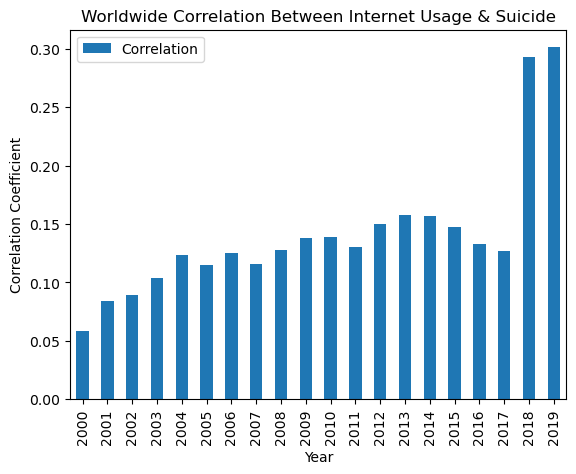

In [43]:
corr2.plot.bar(x = 'Year', y = 'Correlation')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Year')
plt.title('Worldwide Correlation Between Internet Usage & Suicide');

### Now lets look at the same trend but just in the United States.

In [44]:
usdf = intsui.loc[intsui['Country Name'] == 'United States']

In [45]:
usdf = usdf.round(1)

In [46]:
usdf = usdf.rename(columns = {'value_x':'Prct_pop_int_users',
            'value_y': 'Suicide_by_100k' })

In [47]:
usdf

,Country Name,Year_i,Internet_Percentage,Year_s,Suicide
5060,United States,2000,43.1,2000,11.0
5061,United States,2001,49.1,2001,11.4
5062,United States,2002,58.8,2002,11.8
5063,United States,2003,61.7,2003,11.7
5064,United States,2004,64.8,2004,11.9
5065,United States,2005,68.0,2005,11.9
5066,United States,2006,68.9,2006,12.1
5067,United States,2007,75.0,2007,12.4
5068,United States,2008,74.0,2008,12.7
5069,United States,2009,71.0,2009,12.8


In [48]:
usdf.to_csv('../data/usdf_suicide_internet.csv', index= False)

In [49]:
usdf.corr(numeric_only = True)

,Internet_Percentage,Suicide
Internet_Percentage,1.000000,0.897242
Suicide,0.897242,1.000000


### more csv's

In [50]:
uni_sui = pd.read_csv('../data/suicide-rates-in-the-uni.csv')

In [51]:
uni_sui

,Year,Total Population,Female,Male
0,2000,10.4,4.0,17.7
1,2001,10.7,4.1,18.2
2,2002,11.0,4.2,18.5
3,2003,10.8,4.2,18.1
4,2004,11.0,4.5,18.1
5,2005,10.9,4.4,18.1
6,2006,11.0,4.5,18.1
7,2007,11.3,4.7,18.5
8,2008,11.6,4.8,19.0
9,2009,11.8,4.9,19.2


In [52]:
sui_1900 = pd.read_csv('../data/1900-1998sui.csv')

In [53]:
sui_1900 = sui_1900.rename(columns = {'Total Pop':'Total Population'})

In [54]:
sui_1900

,Year,Total Population,Male,Female
0,1999,10.5,17.8,4.0
1,1998,11.3,19.2,4.3
2,1997,11.4,19.4,4.4
3,1996,11.7,20.0,4.3
4,1995,12.0,20.6,4.4
...,...,...,...,...
95,1904,15.4,24.3,6.6
96,1903,14.3,22.5,6.1
97,1902,13.5,21.1,6.0
98,1901,13.3,20.7,6.0


In [55]:
new_sui = pd.merge(uni_sui, sui_1900, 
         left_on = ['Year','Female','Male', 'Total Population'],
         right_on = ['Year','Female','Male', 'Total Population'],
         how = 'outer')

In [56]:
new_sui = new_sui.sort_values(by=['Year'], ascending = False)

In [57]:
new_sui.to_csv('../data/suicide1900-2021.csv', index = False)